ETF DASHBOARD V.2.0

# | Portfolio Surveillance - Price Prediction
- Predict stock prices with Long short-term memory (LSTM) ML
- Colab: Also Integrated Regression Model in Colab: *https://colab.research.google.com/drive/1VgtwjDL0uEKNQYNOMgJmVTk1mo1cTXC8?usp=sharing* 

In [1]:
# Author: Ken Lee and Albert 2020.01.12
# Our Library
import ETFFundamentalData as finData
import ETFHistoryDownload as hist
import sqlalchemy as sql
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from dateutil.relativedelta import relativedelta
from datetime import datetime
from pathlib import Path
# DB Connection
eft_data_connection_string = 'sqlite:///./Resources/etf.db'
our_portfolio_export = Path('./Resources/our_portfolio.csv')
etf_data_engine = sql.create_engine(eft_data_connection_string, echo=True)

In [2]:
def get_dataSet(p_price_df, p_startDt, p_endDt):
    return p_price_df.loc[p_startDt.strftime("%Y-%m-%d"):p_endDt.strftime("%Y-%m-%d")]
#.iloc[:, 3:4].values

In [3]:
# Specifiy PX Prediction Start Date
px_pred_start_date = datetime(2020, 1, 2) 

# will forecast next 3 months
TRAINING_END_DATE = px_pred_start_date - relativedelta(days=1)
TRAINING_START_DATE = TRAINING_END_DATE - relativedelta(years=2)
PREDICTION_START_DATE = px_pred_start_date
PREDICTION_END_DATE = PREDICTION_START_DATE + relativedelta(days=100)

## STEP1. LOAD OUR PORTFOLIO

In [4]:
# Load Fresh_rolling_train Data for ML Training
sql_query = """
SELECT distinct symbol as symbol
FROM 'OUR_PORTFOLIO_LIST'
UNION
SELECT 'SPY'
"""
our_portfolio_list = pd.read_sql_query(sql_query, eft_data_connection_string)
our_portfolio_list = our_portfolio_list.set_index('symbol')  
symbol_list = []
for symbol in our_portfolio_list.index:
    symbol_list.append(symbol)


print(symbol_list)

['ACN', 'AMAT', 'AMD', 'APPS', 'ARWR', 'CBRE', 'DE', 'DHR', 'DOCU', 'EL', 'EPAM', 'FB', 'GE', 'GOOG', 'GOOGL', 'GS', 'IRT', 'KEYS', 'KLAC', 'LCII', 'LIN', 'LRCX', 'LSCC', 'LULU', 'MPWR', 'MRVL', 'MSFT', 'MU', 'NEO', 'NXPI', 'PAYC', 'PLD', 'POOL', 'QCOM', 'QQQ', 'QRVO', 'RH', 'ROKU', 'SAIA', 'SEDG', 'SNBR', 'SNPS', 'SPY', 'STX', 'SWKS', 'TER', 'TGT', 'TSLA', 'UPS', 'VICR', 'WST', 'XLK', 'YETI']


## STEP2. FORECAST FUTURE PRICES OF OUR PORTFOLIO NEXT 60D+

Epoch 1/10
14/14 [==============================] - 28s 536ms/step - loss: 0.0797
Epoch 2/10
14/14 [==============================] - 8s 588ms/step - loss: 0.0207
Epoch 3/10
14/14 [==============================] - 8s 550ms/step - loss: 0.0160
Epoch 4/10
14/14 [==============================] - 8s 596ms/step - loss: 0.0101
Epoch 5/10
14/14 [==============================] - 8s 560ms/step - loss: 0.0110
Epoch 6/10
14/14 [==============================] - 8s 583ms/step - loss: 0.0090
Epoch 7/10
14/14 [==============================] - 8s 540ms/step - loss: 0.0101
Epoch 8/10
14/14 [==============================] - 8s 565ms/step - loss: 0.0093
Epoch 9/10
14/14 [==============================] - 8s 536ms/step - loss: 0.0088
Epoch 10/10
14/14 [==============================] - 8s 556ms/step - loss: 0.0088


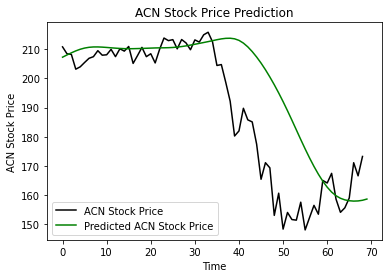

,Real_Px,Date,Pred_Px
0,210.86,2020-01-02,207.317307
1,208.50,2020-01-03,208.077698
2,208.27,2020-01-06,208.808670
3,203.20,2020-01-07,209.477386
4,204.00,2020-01-08,210.035156
...,...,...,...
64,155.60,2020-04-03,158.328217
65,158.98,2020-04-06,158.025909
66,171.08,2020-04-07,157.904053
67,166.58,2020-04-08,157.960297


Epoch 1/10
14/14 [==============================] - 33s 522ms/step - loss: 0.0636
Epoch 2/10
14/14 [==============================] - 8s 586ms/step - loss: 0.0199
Epoch 3/10
14/14 [==============================] - 8s 570ms/step - loss: 0.0148
Epoch 4/10
14/14 [==============================] - 8s 568ms/step - loss: 0.0113
Epoch 5/10
14/14 [==============================] - 8s 585ms/step - loss: 0.0122
Epoch 6/10
14/14 [==============================] - 8s 559ms/step - loss: 0.0108
Epoch 7/10
14/14 [==============================] - 8s 601ms/step - loss: 0.0113
Epoch 8/10
14/14 [==============================] - 8s 587ms/step - loss: 0.0102
Epoch 9/10
14/14 [==============================] - 8s 565ms/step - loss: 0.0090
Epoch 10/10
14/14 [==============================] - 9s 687ms/step - loss: 0.0104


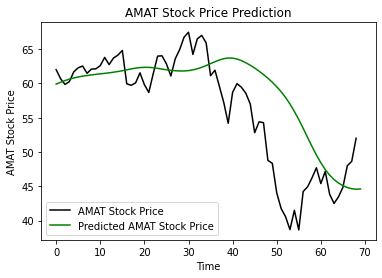

,Real_Px,Date,Pred_Px
0,62.00,2020-01-02,59.894775
1,60.69,2020-01-03,60.162354
2,59.85,2020-01-06,60.408077
3,60.27,2020-01-07,60.621616
4,61.70,2020-01-08,60.797245
...,...,...,...
64,43.46,2020-04-03,45.478771
65,44.84,2020-04-06,45.098980
66,48.00,2020-04-07,44.823154
67,48.63,2020-04-08,44.647812


Epoch 1/10
14/14 [==============================] - 50s 561ms/step - loss: 0.0609
Epoch 2/10
14/14 [==============================] - 9s 670ms/step - loss: 0.0184
Epoch 3/10
14/14 [==============================] - 10s 704ms/step - loss: 0.0133
Epoch 4/10
14/14 [==============================] - 10s 701ms/step - loss: 0.0095
Epoch 5/10
14/14 [==============================] - 8s 580ms/step - loss: 0.0099
Epoch 6/10
14/14 [==============================] - 8s 562ms/step - loss: 0.0077
Epoch 7/10
14/14 [==============================] - 8s 594ms/step - loss: 0.0087
Epoch 8/10
14/14 [==============================] - 8s 575ms/step - loss: 0.0093
Epoch 9/10
14/14 [==============================] - 8s 592ms/step - loss: 0.0075
Epoch 10/10
14/14 [==============================] - 8s 572ms/step - loss: 0.0067


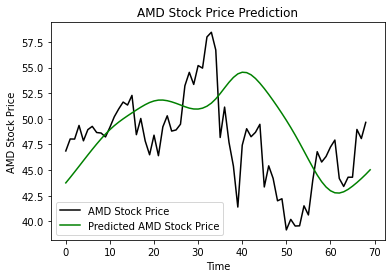

,Real_Px,Date,Pred_Px
0,46.86,2020-01-02,43.747684
1,48.03,2020-01-03,44.274712
2,48.02,2020-01-06,44.816734
3,49.35,2020-01-07,45.365921
4,47.85,2020-01-08,45.920269
...,...,...,...
64,44.30,2020-04-03,43.115002
65,44.30,2020-04-06,43.426998
66,48.96,2020-04-07,43.779881
67,48.07,2020-04-08,44.165321


Epoch 1/10
14/14 [==============================] - 41s 864ms/step - loss: 0.0627
Epoch 2/10
14/14 [==============================] - 15s 1s/step - loss: 0.0127
Epoch 3/10
14/14 [==============================] - 10s 694ms/step - loss: 0.0080
Epoch 4/10
14/14 [==============================] - 9s 656ms/step - loss: 0.0069
Epoch 5/10
14/14 [==============================] - 9s 656ms/step - loss: 0.0051
Epoch 6/10
14/14 [==============================] - 11s 793ms/step - loss: 0.0044
Epoch 7/10
14/14 [==============================] - 12s 858ms/step - loss: 0.0048
Epoch 8/10
14/14 [==============================] - 14s 1s/step - loss: 0.0038
Epoch 9/10
14/14 [==============================] - 13s 886ms/step - loss: 0.0048
Epoch 10/10
14/14 [==============================] - 13s 897ms/step - loss: 0.0046


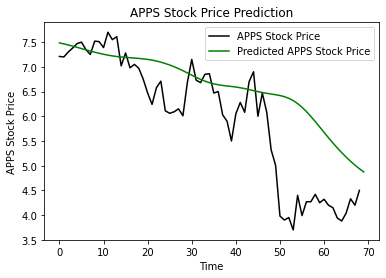

,Real_Px,Date,Pred_Px
0,7.21,2020-01-02,7.485027
1,7.20,2020-01-03,7.464856
2,7.30,2020-01-06,7.442980
3,7.38,2020-01-07,7.419435
4,7.47,2020-01-08,7.394631
...,...,...,...
64,3.88,2020-04-03,5.263654
65,4.04,2020-04-06,5.173703
66,4.33,2020-04-07,5.089129
67,4.20,2020-04-08,5.010526


Epoch 1/10
14/14 [==============================] - 39s 563ms/step - loss: 0.0356
Epoch 2/10
14/14 [==============================] - 15s 1s/step - loss: 0.0059
Epoch 3/10
14/14 [==============================] - 14s 965ms/step - loss: 0.0058
Epoch 4/10
14/14 [==============================] - 13s 939ms/step - loss: 0.0048
Epoch 5/10
14/14 [==============================] - 13s 939ms/step - loss: 0.0048
Epoch 6/10
14/14 [==============================] - 13s 969ms/step - loss: 0.0050
Epoch 7/10
14/14 [==============================] - 17s 1s/step - loss: 0.0037
Epoch 8/10
14/14 [==============================] - 16s 1s/step - loss: 0.0048
Epoch 9/10
14/14 [==============================] - 15s 1s/step - loss: 0.0040
Epoch 10/10
14/14 [==============================] - 20s 1s/step - loss: 0.0037


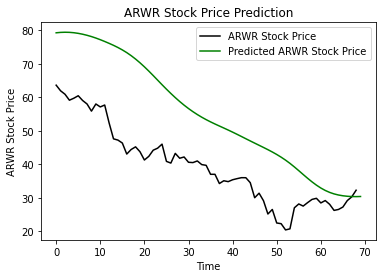

,Real_Px,Date,Pred_Px
0,63.62,2020-01-02,79.259850
1,61.94,2020-01-03,79.382423
2,60.91,2020-01-06,79.427216
3,59.13,2020-01-07,79.395584
4,59.72,2020-01-08,79.284622
...,...,...,...
64,26.50,2020-04-03,30.817059
65,27.22,2020-04-06,30.588970
66,29.15,2020-04-07,30.440233
67,30.25,2020-04-08,30.357767


Epoch 1/10
13/13 [==============================] - 131s 944ms/step - loss: 0.0746
Epoch 2/10
13/13 [==============================] - 13s 1s/step - loss: 0.0224
Epoch 3/10
13/13 [==============================] - 12s 961ms/step - loss: 0.0170
Epoch 4/10
13/13 [==============================] - 15s 1s/step - loss: 0.0157
Epoch 5/10
13/13 [==============================] - 11s 854ms/step - loss: 0.0117
Epoch 6/10
13/13 [==============================] - 13s 995ms/step - loss: 0.0102
Epoch 7/10
13/13 [==============================] - 11s 827ms/step - loss: 0.0109
Epoch 8/10
13/13 [==============================] - 12s 927ms/step - loss: 0.0095
Epoch 9/10
13/13 [==============================] - 14s 1s/step - loss: 0.0099
Epoch 10/10
13/13 [==============================] - 12s 906ms/step - loss: 0.0104


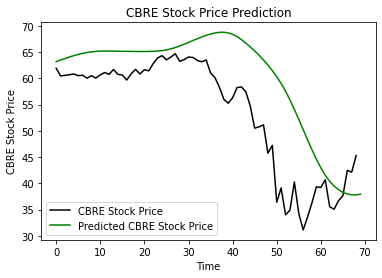

,Real_Px,Date,Pred_Px
0,61.90,2020-01-02,63.158054
1,60.44,2020-01-03,63.464211
2,60.56,2020-01-06,63.764225
3,60.67,2020-01-07,64.048492
4,60.81,2020-01-08,64.309105
...,...,...,...
64,36.67,2020-04-03,38.782192
65,37.62,2020-04-06,38.286797
66,42.45,2020-04-07,37.959385
67,42.12,2020-04-08,37.792576


Epoch 1/10
14/14 [==============================] - 52s 950ms/step - loss: 0.0952
Epoch 2/10
14/14 [==============================] - 16s 1s/step - loss: 0.0384
Epoch 3/10
14/14 [==============================] - 15s 1s/step - loss: 0.0329
Epoch 4/10
14/14 [==============================] - 13s 913ms/step - loss: 0.0301
Epoch 5/10
14/14 [==============================] - 12s 859ms/step - loss: 0.0269
Epoch 6/10
14/14 [==============================] - 12s 873ms/step - loss: 0.0251
Epoch 7/10
14/14 [==============================] - 13s 894ms/step - loss: 0.0256
Epoch 8/10
14/14 [==============================] - 13s 902ms/step - loss: 0.0210
Epoch 9/10
14/14 [==============================] - 13s 911ms/step - loss: 0.0192
Epoch 10/10
14/14 [==============================] - 12s 886ms/step - loss: 0.0183


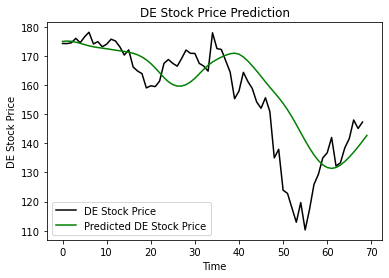

,Real_Px,Date,Pred_Px
0,174.24,2020-01-02,174.943573
1,174.21,2020-01-03,175.078705
2,174.48,2020-01-06,174.979187
3,176.01,2020-01-07,174.694000
4,174.50,2020-01-08,174.306870
...,...,...,...
64,138.48,2020-04-03,133.762283
65,141.58,2020-04-06,135.261520
66,148.00,2020-04-07,136.938187
67,145.08,2020-04-08,138.770737


Epoch 1/10
14/14 [==============================] - 54s 709ms/step - loss: 0.0797
Epoch 2/10
14/14 [==============================] - 13s 909ms/step - loss: 0.0178
Epoch 3/10
14/14 [==============================] - 12s 827ms/step - loss: 0.0114
Epoch 4/10
14/14 [==============================] - 12s 834ms/step - loss: 0.0091
Epoch 5/10
14/14 [==============================] - 12s 833ms/step - loss: 0.0091
Epoch 6/10
14/14 [==============================] - 14s 1s/step - loss: 0.0091
Epoch 7/10
14/14 [==============================] - 15s 1s/step - loss: 0.0083
Epoch 8/10
14/14 [==============================] - 11s 792ms/step - loss: 0.0082
Epoch 9/10
14/14 [==============================] - 12s 880ms/step - loss: 0.0084
Epoch 10/10
14/14 [==============================] - 13s 936ms/step - loss: 0.0077


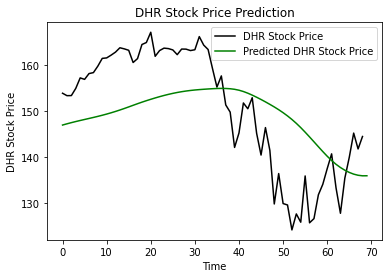

,Real_Px,Date,Pred_Px
0,153.96,2020-01-02,147.034348
1,153.43,2020-01-03,147.301834
2,153.45,2020-01-06,147.556519
3,155.02,2020-01-07,147.797180
4,157.30,2020-01-08,148.025467
...,...,...,...
64,135.49,2020-04-03,137.199158
65,140.00,2020-04-06,136.718079
66,145.28,2020-04-07,136.347153
67,141.83,2020-04-08,136.099915


Epoch 1/10
12/12 [==============================] - 51s 843ms/step - loss: 0.1002
Epoch 2/10
12/12 [==============================] - 12s 978ms/step - loss: 0.0300
Epoch 3/10
12/12 [==============================] - 10s 843ms/step - loss: 0.0255
Epoch 4/10
12/12 [==============================] - 10s 855ms/step - loss: 0.0199
Epoch 5/10
12/12 [==============================] - 10s 800ms/step - loss: 0.0172
Epoch 6/10
12/12 [==============================] - 10s 798ms/step - loss: 0.0154
Epoch 7/10
12/12 [==============================] - 10s 861ms/step - loss: 0.0152
Epoch 8/10
12/12 [==============================] - 9s 787ms/step - loss: 0.0147
Epoch 9/10
12/12 [==============================] - 9s 727ms/step - loss: 0.0138
Epoch 10/10
12/12 [==============================] - 9s 744ms/step - loss: 0.0121


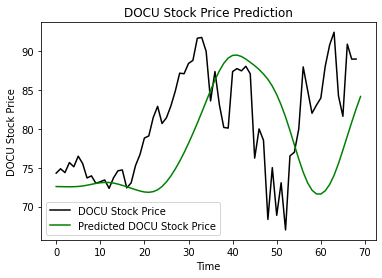

,Real_Px,Date,Pred_Px
0,74.31,2020-01-02,72.583206
1,74.87,2020-01-03,72.572258
2,74.38,2020-01-06,72.560997
3,75.67,2020-01-07,72.554161
4,75.13,2020-01-08,72.563278
...,...,...,...
64,84.26,2020-04-03,75.544212
65,81.63,2020-04-06,77.274498
66,90.91,2020-04-07,79.071213
67,88.99,2020-04-08,80.860497


Epoch 1/10
14/14 [==============================] - 34s 701ms/step - loss: 0.0825
Epoch 2/10
14/14 [==============================] - 12s 852ms/step - loss: 0.0217
Epoch 3/10
14/14 [==============================] - 12s 860ms/step - loss: 0.0138
Epoch 4/10
14/14 [==============================] - 12s 790ms/step - loss: 0.0134
Epoch 5/10
14/14 [==============================] - 10s 752ms/step - loss: 0.0137
Epoch 6/10
14/14 [==============================] - 12s 854ms/step - loss: 0.0122
Epoch 7/10
14/14 [==============================] - 13s 875ms/step - loss: 0.0109
Epoch 8/10
14/14 [==============================] - 12s 874ms/step - loss: 0.0118
Epoch 9/10
14/14 [==============================] - 11s 768ms/step - loss: 0.0103
Epoch 10/10
14/14 [==============================] - 11s 808ms/step - loss: 0.0107


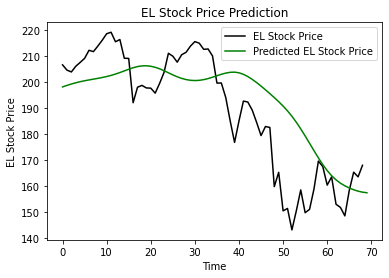

,Real_Px,Date,Pred_Px
0,206.54,2020-01-02,198.071152
1,204.53,2020-01-03,198.648224
2,203.81,2020-01-06,199.184387
3,206.01,2020-01-07,199.662415
4,207.48,2020-01-08,200.077866
...,...,...,...
64,148.57,2020-04-03,160.109207
65,158.32,2020-04-06,159.282516
66,165.34,2020-04-07,158.598755
67,163.55,2020-04-08,158.058563


Epoch 1/10
14/14 [==============================] - 57s 847ms/step - loss: 0.0833
Epoch 2/10
14/14 [==============================] - 12s 876ms/step - loss: 0.0218
Epoch 3/10
14/14 [==============================] - 13s 931ms/step - loss: 0.0128
Epoch 4/10
14/14 [==============================] - 14s 960ms/step - loss: 0.0089
Epoch 5/10
14/14 [==============================] - 12s 844ms/step - loss: 0.0091
Epoch 6/10
14/14 [==============================] - 11s 802ms/step - loss: 0.0088
Epoch 7/10
14/14 [==============================] - 12s 863ms/step - loss: 0.0094
Epoch 8/10
14/14 [==============================] - 11s 787ms/step - loss: 0.0098
Epoch 9/10
14/14 [==============================] - 14s 984ms/step - loss: 0.0085
Epoch 10/10
14/14 [==============================] - 14s 1s/step - loss: 0.0084


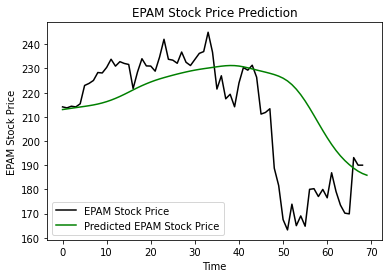

,Real_Px,Date,Pred_Px
0,214.12,2020-01-02,213.012360
1,213.70,2020-01-03,213.278809
2,214.39,2020-01-06,213.544861
3,214.10,2020-01-07,213.809158
4,215.39,2020-01-08,214.069733
...,...,...,...
64,170.15,2020-04-03,191.907639
65,169.85,2020-04-06,190.224548
66,193.14,2020-04-07,188.751251
67,190.00,2020-04-08,187.512802


Epoch 1/10
14/14 [==============================] - 52s 878ms/step - loss: 0.1273
Epoch 2/10
14/14 [==============================] - 12s 848ms/step - loss: 0.0290
Epoch 3/10
14/14 [==============================] - 13s 950ms/step - loss: 0.0215
Epoch 4/10
14/14 [==============================] - 12s 819ms/step - loss: 0.0187
Epoch 5/10
14/14 [==============================] - 11s 786ms/step - loss: 0.0151
Epoch 6/10
14/14 [==============================] - 11s 769ms/step - loss: 0.0158
Epoch 7/10
14/14 [==============================] - 11s 759ms/step - loss: 0.0183
Epoch 8/10
14/14 [==============================] - 13s 934ms/step - loss: 0.0161
Epoch 9/10
14/14 [==============================] - 12s 848ms/step - loss: 0.0148
Epoch 10/10
14/14 [==============================] - 11s 821ms/step - loss: 0.0146


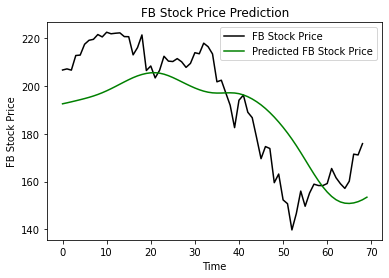

,Real_Px,Date,Pred_Px
0,206.7500,2020-01-02,192.589935
1,207.2135,2020-01-03,192.986832
2,206.7000,2020-01-06,193.415573
3,212.8200,2020-01-07,193.855820
4,213.0000,2020-01-08,194.308853
...,...,...,...
64,157.1500,2020-04-03,150.953842
65,160.1500,2020-04-06,150.839188
66,171.5000,2020-04-07,151.058319
67,171.1600,2020-04-08,151.581909


Epoch 1/10
14/14 [==============================] - 35s 692ms/step - loss: 0.0397
Epoch 2/10
14/14 [==============================] - 11s 810ms/step - loss: 0.0126
Epoch 3/10
14/14 [==============================] - 15s 1s/step - loss: 0.0089
Epoch 4/10
14/14 [==============================] - 13s 899ms/step - loss: 0.0079
Epoch 5/10
14/14 [==============================] - 12s 861ms/step - loss: 0.0067
Epoch 6/10
14/14 [==============================] - 13s 872ms/step - loss: 0.0063
Epoch 7/10
14/14 [==============================] - 12s 878ms/step - loss: 0.0052
Epoch 8/10
14/14 [==============================] - 13s 906ms/step - loss: 0.0049
Epoch 9/10
14/14 [==============================] - 17s 1s/step - loss: 0.0053
Epoch 10/10
14/14 [==============================] - 14s 1s/step - loss: 0.0049


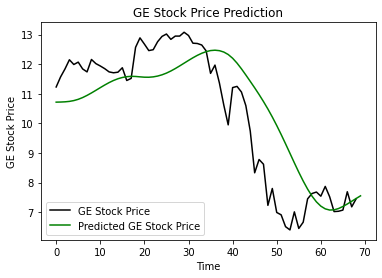

,Real_Px,Date,Pred_Px
0,11.23,2020-01-02,10.717781
1,11.57,2020-01-03,10.721401
2,11.84,2020-01-06,10.728550
3,12.15,2020-01-07,10.743207
4,11.99,2020-01-08,10.770461
...,...,...,...
64,7.03,2020-04-03,7.121901
65,7.07,2020-04-06,7.191488
66,7.69,2020-04-07,7.275753
67,7.18,2020-04-08,7.367778


Epoch 1/10
14/14 [==============================] - 68s 938ms/step - loss: 0.0918
Epoch 2/10
14/14 [==============================] - 15s 1s/step - loss: 0.0258
Epoch 3/10
14/14 [==============================] - 22s 2s/step - loss: 0.0195
Epoch 4/10
14/14 [==============================] - 22s 2s/step - loss: 0.0168
Epoch 5/10
14/14 [==============================] - 17s 1s/step - loss: 0.0137
Epoch 6/10
14/14 [==============================] - 16s 1s/step - loss: 0.0138
Epoch 7/10
14/14 [==============================] - 13s 933ms/step - loss: 0.0169
Epoch 8/10
14/14 [==============================] - 12s 863ms/step - loss: 0.0130
Epoch 9/10
14/14 [==============================] - 12s 880ms/step - loss: 0.0134
Epoch 10/10
14/14 [==============================] - 12s 837ms/step - loss: 0.0129


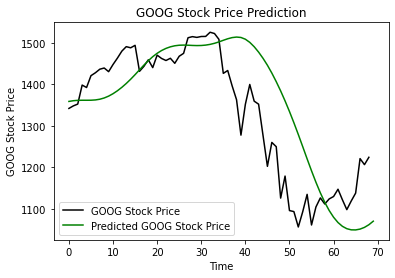

,Real_Px,Date,Pred_Px
0,1341.780,2020-01-02,1358.618530
1,1347.860,2020-01-03,1360.315308
2,1352.230,2020-01-06,1361.226562
3,1397.940,2020-01-07,1361.453003
4,1392.080,2020-01-08,1361.421143
...,...,...,...
64,1119.015,2020-04-03,1049.636597
65,1138.000,2020-04-06,1049.439575
66,1221.000,2020-04-07,1051.406372
67,1206.500,2020-04-08,1055.557373


Epoch 1/10
14/14 [==============================] - 98s 900ms/step - loss: 0.0730
Epoch 2/10
14/14 [==============================] - 18s 1s/step - loss: 0.0231
Epoch 3/10
14/14 [==============================] - 15s 1s/step - loss: 0.0185
Epoch 4/10
14/14 [==============================] - 18s 1s/step - loss: 0.0173
Epoch 5/10
14/14 [==============================] - 15s 1s/step - loss: 0.0162
Epoch 6/10
14/14 [==============================] - 15s 1s/step - loss: 0.0158
Epoch 7/10
14/14 [==============================] - 14s 979ms/step - loss: 0.0130
Epoch 8/10
14/14 [==============================] - 14s 984ms/step - loss: 0.0137
Epoch 9/10
14/14 [==============================] - 17s 1s/step - loss: 0.0143
Epoch 10/10
14/14 [==============================] - 16s 1s/step - loss: 0.0135


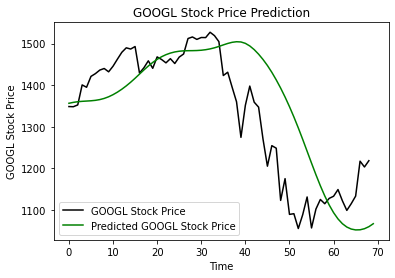

,Real_Px,Date,Pred_Px
0,1348.41,2020-01-02,1356.307983
1,1348.00,2020-01-03,1358.495117
2,1352.35,2020-01-06,1360.044312
3,1400.46,2020-01-07,1360.987915
4,1394.82,2020-01-08,1361.644165
...,...,...,...
64,1114.71,2020-04-03,1053.719727
65,1133.00,2020-04-06,1051.633301
66,1217.01,2020-04-07,1051.926758
67,1203.10,2020-04-08,1054.540405


Epoch 1/10
14/14 [==============================] - 94s 1s/step - loss: 0.0702
Epoch 2/10
14/14 [==============================] - 15s 1s/step - loss: 0.0165
Epoch 3/10
14/14 [==============================] - 17s 1s/step - loss: 0.0141
Epoch 4/10
14/14 [==============================] - 16s 1s/step - loss: 0.0111
Epoch 5/10
14/14 [==============================] - 18s 1s/step - loss: 0.0099
Epoch 6/10
14/14 [==============================] - 18s 1s/step - loss: 0.0100
Epoch 7/10
14/14 [==============================] - 15s 1s/step - loss: 0.0087
Epoch 8/10
14/14 [==============================] - 16s 1s/step - loss: 0.0100
Epoch 9/10
14/14 [==============================] - 15s 1s/step - loss: 0.0101
Epoch 10/10
14/14 [==============================] - 15s 1s/step - loss: 0.0086


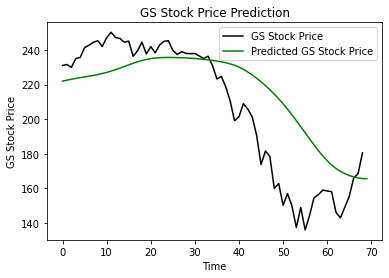

,Real_Px,Date,Pred_Px
0,231.00,2020-01-02,221.989807
1,231.60,2020-01-03,222.568069
2,229.93,2020-01-06,223.100937
3,235.00,2020-01-07,223.580399
4,235.68,2020-01-08,224.015350
...,...,...,...
64,149.20,2020-04-03,168.528687
65,155.47,2020-04-06,167.463089
66,166.00,2020-04-07,166.633682
67,168.55,2020-04-08,166.041656


Epoch 1/10
14/14 [==============================] - 76s 1s/step - loss: 0.0659
Epoch 2/10
14/14 [==============================] - 14s 1s/step - loss: 0.0178
Epoch 3/10
14/14 [==============================] - 15s 1s/step - loss: 0.0085
Epoch 4/10
14/14 [==============================] - 14s 1s/step - loss: 0.0057
Epoch 5/10
14/14 [==============================] - 14s 1s/step - loss: 0.0055
Epoch 6/10
14/14 [==============================] - 16s 1s/step - loss: 0.0062
Epoch 7/10
14/14 [==============================] - 15s 1s/step - loss: 0.0060
Epoch 8/10
14/14 [==============================] - 14s 1s/step - loss: 0.0054
Epoch 9/10
14/14 [==============================] - 15s 1s/step - loss: 0.0053
Epoch 10/10
14/14 [==============================] - 15s 1s/step - loss: 0.0052


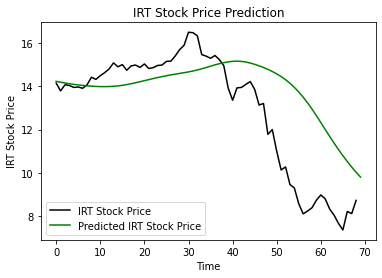

,Real_Px,Date,Pred_Px
0,14.14,2020-01-02,14.219195
1,13.78,2020-01-03,14.180241
2,14.06,2020-01-06,14.143702
3,14.03,2020-01-07,14.110296
4,13.94,2020-01-08,14.080557
...,...,...,...
64,7.68,2020-04-03,11.080838
65,7.38,2020-04-06,10.797641
66,8.23,2020-04-07,10.527490
67,8.13,2020-04-08,10.271725


Epoch 1/10
14/14 [==============================] - 71s 1s/step - loss: 0.0790
Epoch 2/10
14/14 [==============================] - 15s 1s/step - loss: 0.0185
Epoch 3/10
14/14 [==============================] - 16s 1s/step - loss: 0.0105
Epoch 4/10
14/14 [==============================] - 15s 1s/step - loss: 0.0088
Epoch 5/10
14/14 [==============================] - 15s 1s/step - loss: 0.0084
Epoch 6/10
14/14 [==============================] - 15s 1s/step - loss: 0.0076
Epoch 7/10
14/14 [==============================] - 20s 1s/step - loss: 0.0083
Epoch 8/10
14/14 [==============================] - 15s 1s/step - loss: 0.0096
Epoch 9/10
14/14 [==============================] - 15s 1s/step - loss: 0.0087
Epoch 10/10
14/14 [==============================] - 15s 1s/step - loss: 0.0084


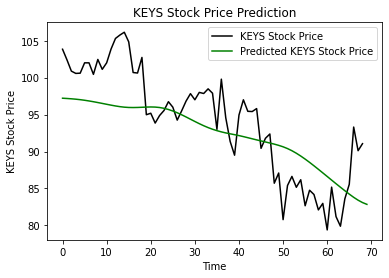

,Real_Px,Date,Pred_Px
0,103.84,2020-01-02,97.212532
1,102.41,2020-01-03,97.176003
2,100.88,2020-01-06,97.133209
3,100.57,2020-01-07,97.080788
4,100.60,2020-01-08,97.015457
...,...,...,...
64,83.60,2020-04-03,84.694160
65,85.56,2020-04-06,84.235909
66,93.31,2020-04-07,83.801346
67,90.11,2020-04-08,83.414040


Epoch 1/10
14/14 [==============================] - 22s 452ms/step - loss: 0.0747
Epoch 2/10
14/14 [==============================] - 7s 485ms/step - loss: 0.0183
Epoch 3/10
14/14 [==============================] - 8s 540ms/step - loss: 0.0114
Epoch 4/10
14/14 [==============================] - 8s 581ms/step - loss: 0.0102
Epoch 5/10
14/14 [==============================] - 8s 586ms/step - loss: 0.0099
Epoch 6/10
14/14 [==============================] - 11s 756ms/step - loss: 0.0095
Epoch 7/10
14/14 [==============================] - 10s 726ms/step - loss: 0.0101
Epoch 8/10
14/14 [==============================] - 10s 721ms/step - loss: 0.0087
Epoch 9/10
14/14 [==============================] - 10s 724ms/step - loss: 0.0070
Epoch 10/10
14/14 [==============================] - 10s 724ms/step - loss: 0.0081


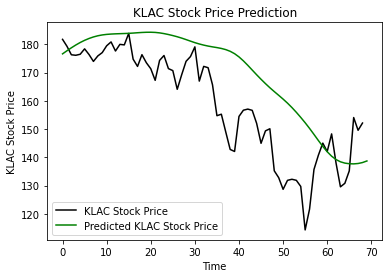

,Real_Px,Date,Pred_Px
0,181.78,2020-01-02,176.643814
1,179.33,2020-01-03,177.734634
2,176.32,2020-01-06,178.787582
3,176.14,2020-01-07,179.771576
4,176.50,2020-01-08,180.659195
...,...,...,...
64,130.82,2020-04-03,137.970123
65,135.21,2020-04-06,137.748596
66,154.10,2020-04-07,137.696457
67,149.59,2020-04-08,137.829315


Epoch 1/10
14/14 [==============================] - 41s 902ms/step - loss: 0.0507
Epoch 2/10
14/14 [==============================] - 12s 877ms/step - loss: 0.0139
Epoch 3/10
14/14 [==============================] - 12s 859ms/step - loss: 0.0111
Epoch 4/10
14/14 [==============================] - 11s 819ms/step - loss: 0.0093
Epoch 5/10
14/14 [==============================] - 11s 821ms/step - loss: 0.0080
Epoch 6/10
14/14 [==============================] - 11s 789ms/step - loss: 0.0080
Epoch 7/10
14/14 [==============================] - 11s 802ms/step - loss: 0.0082
Epoch 8/10
14/14 [==============================] - 11s 757ms/step - loss: 0.0073
Epoch 9/10
14/14 [==============================] - 11s 805ms/step - loss: 0.0069
Epoch 10/10
14/14 [==============================] - 14s 1s/step - loss: 0.0067


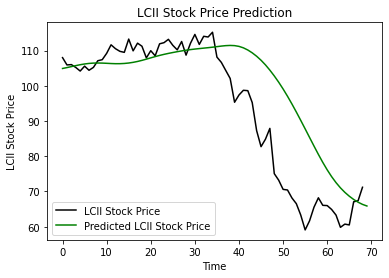

,Real_Px,Date,Pred_Px
0,108.00,2020-01-02,104.922546
1,105.93,2020-01-03,105.174896
2,106.02,2020-01-06,105.451996
3,105.21,2020-01-07,105.730492
4,104.19,2020-01-08,105.987190
...,...,...,...
64,60.73,2020-04-03,69.747673
65,60.49,2020-04-06,68.657257
66,67.07,2020-04-07,67.727562
67,67.37,2020-04-08,66.951424


Epoch 1/10
14/14 [==============================] - 50s 735ms/step - loss: 0.0705
Epoch 2/10
14/14 [==============================] - 11s 810ms/step - loss: 0.0195
Epoch 3/10
14/14 [==============================] - 11s 751ms/step - loss: 0.0103
Epoch 4/10
14/14 [==============================] - 10s 741ms/step - loss: 0.0098
Epoch 5/10
14/14 [==============================] - 11s 757ms/step - loss: 0.0105
Epoch 6/10
14/14 [==============================] - 11s 753ms/step - loss: 0.0096
Epoch 7/10
14/14 [==============================] - 11s 767ms/step - loss: 0.0091
Epoch 8/10
14/14 [==============================] - 13s 892ms/step - loss: 0.0100
Epoch 9/10
14/14 [==============================] - 11s 811ms/step - loss: 0.0084
Epoch 10/10
14/14 [==============================] - 12s 874ms/step - loss: 0.0079


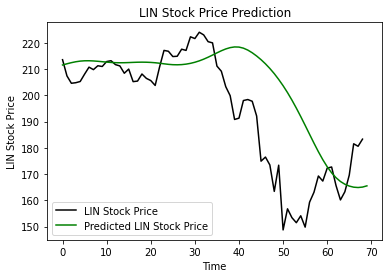

,Real_Px,Date,Pred_Px
0,213.58,2020-01-02,211.566971
1,207.40,2020-01-03,212.023590
2,204.60,2020-01-06,212.445450
3,204.81,2020-01-07,212.794250
4,205.27,2020-01-08,213.039413
...,...,...,...
64,163.25,2020-04-03,166.133224
65,169.61,2020-04-06,165.425201
66,181.54,2020-04-07,165.005402
67,180.59,2020-04-08,164.875397


Epoch 1/10
14/14 [==============================] - 51s 751ms/step - loss: 0.0682
Epoch 2/10
14/14 [==============================] - 11s 780ms/step - loss: 0.0197
Epoch 3/10
14/14 [==============================] - 11s 767ms/step - loss: 0.0108
Epoch 4/10
14/14 [==============================] - 10s 726ms/step - loss: 0.0094
Epoch 5/10
14/14 [==============================] - 10s 734ms/step - loss: 0.0094
Epoch 6/10
14/14 [==============================] - 10s 723ms/step - loss: 0.0076
Epoch 7/10
14/14 [==============================] - 10s 678ms/step - loss: 0.0089
Epoch 8/10
14/14 [==============================] - 10s 748ms/step - loss: 0.0081
Epoch 9/10
14/14 [==============================] - 10s 746ms/step - loss: 0.0077
Epoch 10/10
14/14 [==============================] - 10s 698ms/step - loss: 0.0072


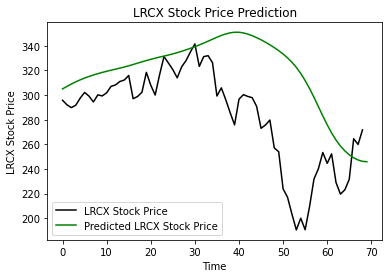

,Real_Px,Date,Pred_Px
0,295.78,2020-01-02,304.996033
1,292.05,2020-01-03,307.011780
2,289.79,2020-01-06,308.935699
3,291.74,2020-01-07,310.719238
4,297.48,2020-01-08,312.332489
...,...,...,...
64,223.06,2020-04-03,254.673233
65,231.62,2020-04-06,251.510910
66,264.52,2020-04-07,249.034973
67,259.89,2020-04-08,247.257416


Epoch 1/10
14/14 [==============================] - 122s 1s/step - loss: 0.0669
Epoch 2/10
14/14 [==============================] - 16s 1s/step - loss: 0.0141
Epoch 3/10
14/14 [==============================] - 15s 1s/step - loss: 0.0080
Epoch 4/10
14/14 [==============================] - 16s 1s/step - loss: 0.0082
Epoch 5/10
14/14 [==============================] - 13s 931ms/step - loss: 0.0086
Epoch 6/10
14/14 [==============================] - 13s 900ms/step - loss: 0.0071
Epoch 7/10
14/14 [==============================] - 15s 1s/step - loss: 0.0067
Epoch 8/10
14/14 [==============================] - 14s 1s/step - loss: 0.0067
Epoch 9/10
14/14 [==============================] - 15s 1s/step - loss: 0.0069
Epoch 10/10
14/14 [==============================] - 12s 864ms/step - loss: 0.0075


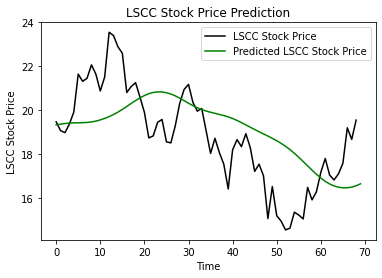

,Real_Px,Date,Pred_Px
0,19.46,2020-01-02,19.324310
1,19.06,2020-01-03,19.358637
2,18.97,2020-01-06,19.385534
3,19.36,2020-01-07,19.403818
4,19.91,2020-01-08,19.413874
...,...,...,...
64,17.09,2020-04-03,16.478745
65,17.57,2020-04-06,16.451590
66,19.19,2020-04-07,16.452806
67,18.66,2020-04-08,16.483717


Epoch 1/10
14/14 [==============================] - 109s 902ms/step - loss: 0.0736
Epoch 2/10
14/14 [==============================] - 16s 1s/step - loss: 0.0141
Epoch 3/10
14/14 [==============================] - 14s 967ms/step - loss: 0.0097
Epoch 4/10
14/14 [==============================] - 15s 1s/step - loss: 0.0095
Epoch 5/10
14/14 [==============================] - 17s 1s/step - loss: 0.0075
Epoch 6/10
14/14 [==============================] - 21s 1s/step - loss: 0.0066
Epoch 7/10
14/14 [==============================] - 17s 1s/step - loss: 0.0066
Epoch 8/10
14/14 [==============================] - 17s 1s/step - loss: 0.0061
Epoch 9/10
14/14 [==============================] - 16s 1s/step - loss: 0.0071
Epoch 10/10
14/14 [==============================] - 17s 1s/step - loss: 0.0068


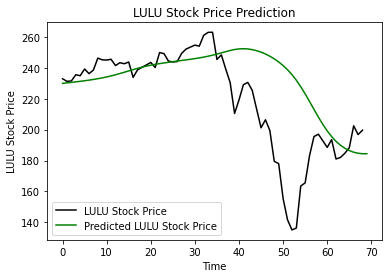

,Real_Px,Date,Pred_Px
0,232.90,2020-01-02,229.930557
1,231.24,2020-01-03,230.241760
2,231.49,2020-01-06,230.562454
3,235.50,2020-01-07,230.893845
4,234.88,2020-01-08,231.242920
...,...,...,...
64,184.71,2020-04-03,187.951584
65,188.22,2020-04-06,186.461441
66,202.48,2020-04-07,185.391022
67,196.80,2020-04-08,184.716858


Epoch 1/10
14/14 [==============================] - 106s 1s/step - loss: 0.0874
Epoch 2/10
14/14 [==============================] - 14s 1s/step - loss: 0.0310
Epoch 3/10
14/14 [==============================] - 12s 838ms/step - loss: 0.0196
Epoch 4/10
14/14 [==============================] - 13s 934ms/step - loss: 0.0173
Epoch 5/10
14/14 [==============================] - 16s 1s/step - loss: 0.0156
Epoch 6/10
14/14 [==============================] - 16s 1s/step - loss: 0.0162
Epoch 7/10
14/14 [==============================] - 13s 860ms/step - loss: 0.0152
Epoch 8/10
14/14 [==============================] - 12s 867ms/step - loss: 0.0133
Epoch 9/10
14/14 [==============================] - 14s 979ms/step - loss: 0.0119
Epoch 10/10
14/14 [==============================] - 14s 935ms/step - loss: 0.0122


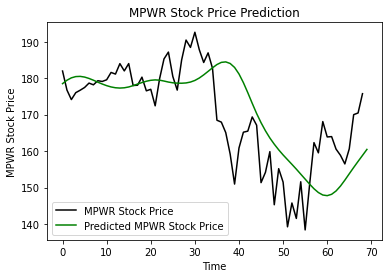

,Real_Px,Date,Pred_Px
0,181.96,2020-01-02,178.498657
1,176.74,2020-01-03,179.436569
2,174.13,2020-01-06,180.088211
3,176.03,2020-01-07,180.433945
4,176.70,2020-01-08,180.490585
...,...,...,...
64,156.49,2020-04-03,152.044342
65,160.63,2020-04-06,153.790024
66,170.00,2020-04-07,155.515045
67,170.46,2020-04-08,157.190979


Epoch 1/10
14/14 [==============================] - 120s 1s/step - loss: 0.0960
Epoch 2/10
14/14 [==============================] - 12s 815ms/step - loss: 0.0249
Epoch 3/10
14/14 [==============================] - 14s 1s/step - loss: 0.0183
Epoch 4/10
14/14 [==============================] - 15s 1s/step - loss: 0.0151
Epoch 5/10
14/14 [==============================] - 10s 662ms/step - loss: 0.0157
Epoch 6/10
14/14 [==============================] - 9s 634ms/step - loss: 0.0149
Epoch 7/10
14/14 [==============================] - 9s 677ms/step - loss: 0.0145
Epoch 8/10
14/14 [==============================] - 9s 665ms/step - loss: 0.0141
Epoch 9/10
14/14 [==============================] - 9s 644ms/step - loss: 0.0140
Epoch 10/10
14/14 [==============================] - 9s 677ms/step - loss: 0.0140


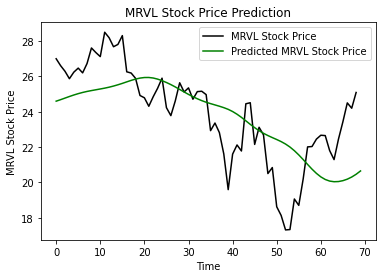

,Real_Px,Date,Pred_Px
0,27.00,2020-01-02,24.598162
1,26.61,2020-01-03,24.682758
2,26.29,2020-01-06,24.772455
3,25.87,2020-01-07,24.862545
4,26.24,2020-01-08,24.947485
...,...,...,...
64,22.45,2020-04-03,20.048420
65,23.43,2020-04-06,20.097609
66,24.50,2020-04-07,20.182755
67,24.20,2020-04-08,20.303946


Epoch 1/10
14/14 [==============================] - 72s 649ms/step - loss: 0.0671
Epoch 2/10
14/14 [==============================] - 9s 649ms/step - loss: 0.0151
Epoch 3/10
14/14 [==============================] - 9s 651ms/step - loss: 0.0079
Epoch 4/10
14/14 [==============================] - 8s 597ms/step - loss: 0.0056
Epoch 5/10
14/14 [==============================] - 8s 568ms/step - loss: 0.0068
Epoch 6/10
14/14 [==============================] - 9s 618ms/step - loss: 0.0052
Epoch 7/10
14/14 [==============================] - 9s 648ms/step - loss: 0.0050
Epoch 8/10
14/14 [==============================] - 9s 618ms/step - loss: 0.0054
Epoch 9/10
14/14 [==============================] - 8s 563ms/step - loss: 0.0045
Epoch 10/10
14/14 [==============================] - 8s 581ms/step - loss: 0.0049


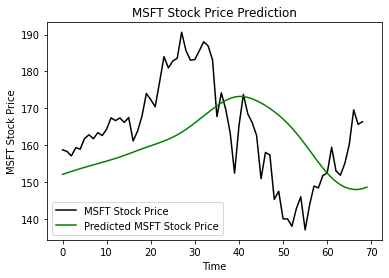

,Real_Px,Date,Pred_Px
0,158.74,2020-01-02,152.091187
1,158.32,2020-01-03,152.478897
2,157.08,2020-01-06,152.869461
3,159.32,2020-01-07,153.253006
4,158.93,2020-01-08,153.624542
...,...,...,...
64,155.10,2020-04-03,148.629272
65,160.17,2020-04-06,148.207550
66,169.59,2020-04-07,147.990173
67,165.67,2020-04-08,147.987991


Epoch 1/10
14/14 [==============================] - 53s 503ms/step - loss: 0.0720
Epoch 2/10
14/14 [==============================] - 8s 552ms/step - loss: 0.0258
Epoch 3/10
14/14 [==============================] - 9s 592ms/step - loss: 0.0202
Epoch 4/10
14/14 [==============================] - 9s 677ms/step - loss: 0.0188
Epoch 5/10
14/14 [==============================] - 9s 654ms/step - loss: 0.0163
Epoch 6/10
14/14 [==============================] - 8s 599ms/step - loss: 0.0177
Epoch 7/10
14/14 [==============================] - 9s 654ms/step - loss: 0.0167
Epoch 8/10
14/14 [==============================] - 8s 602ms/step - loss: 0.0152
Epoch 9/10
14/14 [==============================] - 8s 592ms/step - loss: 0.0158
Epoch 10/10
14/14 [==============================] - 10s 704ms/step - loss: 0.0146


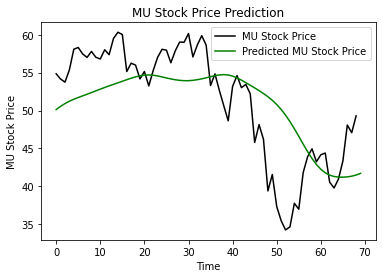

,Real_Px,Date,Pred_Px
0,54.8500,2020-01-02,50.135731
1,54.1600,2020-01-03,50.556362
2,53.7500,2020-01-06,50.924725
3,55.3800,2020-01-07,51.236061
4,58.0900,2020-01-08,51.495945
...,...,...,...
64,40.9700,2020-04-03,41.229794
65,43.3500,2020-04-06,41.217361
66,48.0900,2020-04-07,41.253914
67,47.0800,2020-04-08,41.345398


Epoch 1/10
14/14 [==============================] - 41s 523ms/step - loss: 0.0675
Epoch 2/10
14/14 [==============================] - 7s 509ms/step - loss: 0.0152
Epoch 3/10
14/14 [==============================] - 7s 501ms/step - loss: 0.0106
Epoch 4/10
14/14 [==============================] - 7s 511ms/step - loss: 0.0087
Epoch 5/10
14/14 [==============================] - 7s 512ms/step - loss: 0.0081
Epoch 6/10
14/14 [==============================] - 7s 515ms/step - loss: 0.0083
Epoch 7/10
14/14 [==============================] - 7s 486ms/step - loss: 0.0096
Epoch 8/10
14/14 [==============================] - 7s 486ms/step - loss: 0.0074
Epoch 9/10
14/14 [==============================] - 7s 481ms/step - loss: 0.0074
Epoch 10/10
14/14 [==============================] - 7s 474ms/step - loss: 0.0077


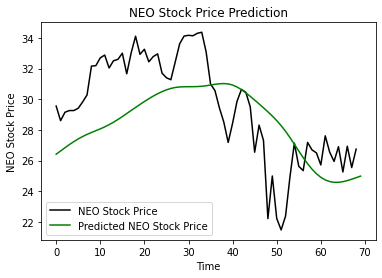

,Real_Px,Date,Pred_Px
0,29.55,2020-01-02,26.410519
1,28.60,2020-01-03,26.622522
2,29.15,2020-01-06,26.834297
3,29.26,2020-01-07,27.038942
4,29.26,2020-01-08,27.231176
...,...,...,...
64,26.90,2020-04-03,24.576895
65,25.25,2020-04-06,24.618578
66,26.93,2020-04-07,24.688450
67,25.54,2020-04-08,24.778265


Epoch 1/10
14/14 [==============================] - 34s 582ms/step - loss: 0.1033
Epoch 2/10
14/14 [==============================] - 8s 579ms/step - loss: 0.0223
Epoch 3/10
14/14 [==============================] - 8s 558ms/step - loss: 0.0162
Epoch 4/10
14/14 [==============================] - 8s 573ms/step - loss: 0.0152
Epoch 5/10
14/14 [==============================] - 8s 571ms/step - loss: 0.0134
Epoch 6/10
14/14 [==============================] - 8s 567ms/step - loss: 0.0132
Epoch 7/10
14/14 [==============================] - 10s 706ms/step - loss: 0.0116
Epoch 8/10
14/14 [==============================] - 11s 772ms/step - loss: 0.0112
Epoch 9/10
14/14 [==============================] - 9s 653ms/step - loss: 0.0121
Epoch 10/10
14/14 [==============================] - 9s 655ms/step - loss: 0.0125


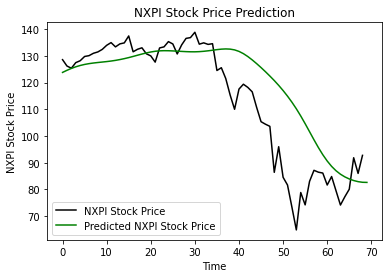

,Real_Px,Date,Pred_Px
0,128.61,2020-01-02,123.833267
1,126.23,2020-01-03,124.617142
2,125.40,2020-01-06,125.325600
3,127.50,2020-01-07,125.933098
4,128.21,2020-01-08,126.430138
...,...,...,...
64,77.26,2020-04-03,84.698311
65,80.07,2020-04-06,83.923195
66,91.87,2020-04-07,83.327805
67,86.00,2020-04-08,82.912239


Epoch 1/10
14/14 [==============================] - 45s 642ms/step - loss: 0.0669
Epoch 2/10
14/14 [==============================] - 8s 597ms/step - loss: 0.0170
Epoch 3/10
14/14 [==============================] - 9s 622ms/step - loss: 0.0134
Epoch 4/10
14/14 [==============================] - 9s 611ms/step - loss: 0.0096
Epoch 5/10
14/14 [==============================] - 10s 683ms/step - loss: 0.0102
Epoch 6/10
14/14 [==============================] - 11s 753ms/step - loss: 0.0076
Epoch 7/10
14/14 [==============================] - 10s 715ms/step - loss: 0.0088
Epoch 8/10
14/14 [==============================] - 9s 656ms/step - loss: 0.0082
Epoch 9/10
14/14 [==============================] - 9s 667ms/step - loss: 0.0081
Epoch 10/10
14/14 [==============================] - 9s 614ms/step - loss: 0.0089


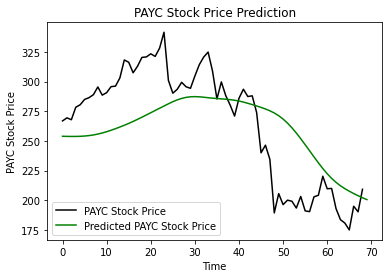

,Real_Px,Date,Pred_Px
0,266.92,2020-01-02,253.968796
1,269.49,2020-01-03,253.858948
2,267.90,2020-01-06,253.810959
3,278.40,2020-01-07,253.826019
4,280.54,2020-01-08,253.931610
...,...,...,...
64,180.82,2020-04-03,209.818314
65,175.05,2020-04-06,207.671921
66,194.99,2020-04-07,205.699814
67,190.31,2020-04-08,203.863052


Epoch 1/10
14/14 [==============================] - 35s 597ms/step - loss: 0.0805
Epoch 2/10
14/14 [==============================] - 9s 634ms/step - loss: 0.0195
Epoch 3/10
14/14 [==============================] - 10s 721ms/step - loss: 0.0101
Epoch 4/10
14/14 [==============================] - 11s 774ms/step - loss: 0.0081
Epoch 5/10
14/14 [==============================] - 11s 788ms/step - loss: 0.0076
Epoch 6/10
14/14 [==============================] - 9s 610ms/step - loss: 0.0066
Epoch 7/10
14/14 [==============================] - 11s 812ms/step - loss: 0.0074
Epoch 8/10
14/14 [==============================] - 10s 723ms/step - loss: 0.0070
Epoch 9/10
14/14 [==============================] - 10s 688ms/step - loss: 0.0066
Epoch 10/10
14/14 [==============================] - 10s 744ms/step - loss: 0.0069


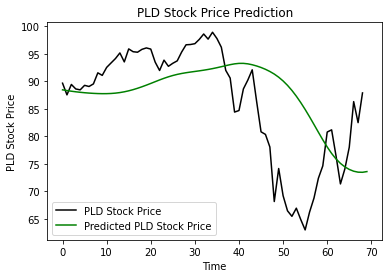

,Real_Px,Date,Pred_Px
0,89.67,2020-01-02,88.461761
1,87.55,2020-01-03,88.331749
2,89.44,2020-01-06,88.212166
3,88.62,2020-01-07,88.106171
4,88.46,2020-01-08,88.014374
...,...,...,...
64,74.08,2020-04-03,74.463089
65,78.03,2020-04-06,73.994278
66,86.32,2020-04-07,73.670296
67,82.50,2020-04-08,73.497482


Epoch 1/10
14/14 [==============================] - 25s 585ms/step - loss: 0.0759
Epoch 2/10
14/14 [==============================] - 7s 488ms/step - loss: 0.0187
Epoch 3/10
14/14 [==============================] - 7s 480ms/step - loss: 0.0101
Epoch 4/10
14/14 [==============================] - 8s 594ms/step - loss: 0.0072
Epoch 5/10
14/14 [==============================] - 8s 539ms/step - loss: 0.0083
Epoch 6/10
14/14 [==============================] - 9s 677ms/step - loss: 0.0078
Epoch 7/10
14/14 [==============================] - 11s 787ms/step - loss: 0.0069
Epoch 8/10
14/14 [==============================] - 6s 431ms/step - loss: 0.0074
Epoch 9/10
14/14 [==============================] - 6s 395ms/step - loss: 0.0072
Epoch 10/10
14/14 [==============================] - 6s 409ms/step - loss: 0.0080


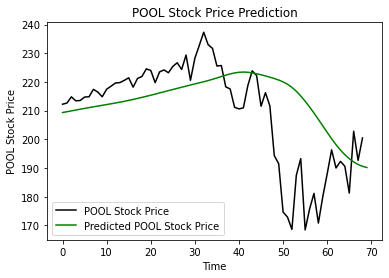

,Real_Px,Date,Pred_Px
0,212.24,2020-01-02,209.340607
1,212.65,2020-01-03,209.626770
2,214.81,2020-01-06,209.917831
3,213.43,2020-01-07,210.210938
4,213.53,2020-01-08,210.501465
...,...,...,...
64,190.62,2020-04-03,194.625961
65,181.25,2020-04-06,193.255051
66,202.82,2020-04-07,192.118347
67,192.65,2020-04-08,191.230499


Epoch 1/10
14/14 [==============================] - 30s 608ms/step - loss: 0.0832
Epoch 2/10
14/14 [==============================] - 8s 555ms/step - loss: 0.0314
Epoch 3/10
14/14 [==============================] - 8s 564ms/step - loss: 0.0262
Epoch 4/10
14/14 [==============================] - 8s 598ms/step - loss: 0.0235
Epoch 5/10
14/14 [==============================] - 9s 626ms/step - loss: 0.0211
Epoch 6/10
14/14 [==============================] - 8s 558ms/step - loss: 0.0197
Epoch 7/10
14/14 [==============================] - 9s 647ms/step - loss: 0.0186
Epoch 8/10
14/14 [==============================] - 8s 598ms/step - loss: 0.0165
Epoch 9/10
14/14 [==============================] - 7s 486ms/step - loss: 0.0169
Epoch 10/10
14/14 [==============================] - 8s 574ms/step - loss: 0.0152


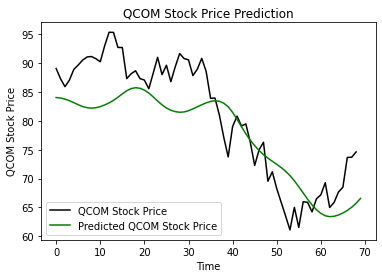

,Real_Px,Date,Pred_Px
0,89.05,2020-01-02,84.032471
1,87.26,2020-01-03,83.940453
2,85.91,2020-01-06,83.759308
3,87.04,2020-01-07,83.485649
4,88.90,2020-01-08,83.142624
...,...,...,...
64,67.68,2020-04-03,63.704231
65,68.50,2020-04-06,64.052658
66,73.66,2020-04-07,64.491936
67,73.70,2020-04-08,65.045456


Epoch 1/10
14/14 [==============================] - 27s 629ms/step - loss: 0.0824
Epoch 2/10
14/14 [==============================] - 8s 606ms/step - loss: 0.0194
Epoch 3/10
14/14 [==============================] - 8s 552ms/step - loss: 0.0134
Epoch 4/10
14/14 [==============================] - 8s 566ms/step - loss: 0.0114
Epoch 5/10
14/14 [==============================] - 8s 564ms/step - loss: 0.0097
Epoch 6/10
14/14 [==============================] - 8s 597ms/step - loss: 0.0101
Epoch 7/10
14/14 [==============================] - 8s 556ms/step - loss: 0.0093
Epoch 8/10
14/14 [==============================] - 7s 510ms/step - loss: 0.0100
Epoch 9/10
14/14 [==============================] - 7s 498ms/step - loss: 0.0097
Epoch 10/10
14/14 [==============================] - 7s 513ms/step - loss: 0.0084


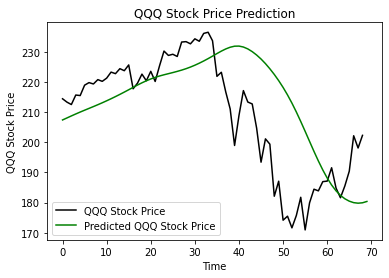

,Real_Px,Date,Pred_Px
0,214.4000,2020-01-02,207.379990
1,213.2900,2020-01-03,208.045624
2,212.4900,2020-01-06,208.713104
3,215.6400,2020-01-07,209.365952
4,215.4700,2020-01-08,209.999405
...,...,...,...
64,185.5000,2020-04-03,181.246414
65,190.3800,2020-04-06,180.450378
66,202.1400,2020-04-07,179.960190
67,198.0835,2020-04-08,179.782440


Epoch 1/10
14/14 [==============================] - 22s 608ms/step - loss: 0.0460
Epoch 2/10
14/14 [==============================] - 9s 643ms/step - loss: 0.0184
Epoch 3/10
14/14 [==============================] - 8s 574ms/step - loss: 0.0133
Epoch 4/10
14/14 [==============================] - 7s 525ms/step - loss: 0.0096
Epoch 5/10
14/14 [==============================] - 7s 513ms/step - loss: 0.0086
Epoch 6/10
14/14 [==============================] - 8s 531ms/step - loss: 0.0076
Epoch 7/10
14/14 [==============================] - 8s 578ms/step - loss: 0.0075
Epoch 8/10
14/14 [==============================] - 8s 550ms/step - loss: 0.0081
Epoch 9/10
14/14 [==============================] - 11s 760ms/step - loss: 0.0065
Epoch 10/10
14/14 [==============================] - 9s 597ms/step - loss: 0.0070


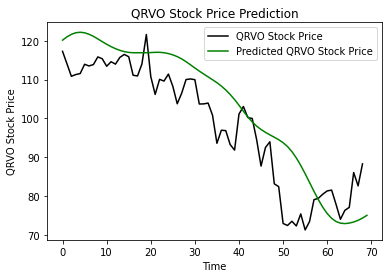

,Real_Px,Date,Pred_Px
0,117.26,2020-01-02,120.146080
1,114.06,2020-01-03,121.000145
2,110.83,2020-01-06,121.651794
3,111.28,2020-01-07,122.055748
4,111.54,2020-01-08,122.187042
...,...,...,...
64,76.28,2020-04-03,72.870865
65,77.05,2020-04-06,72.995201
66,86.04,2020-04-07,73.279915
67,82.59,2020-04-08,73.712944


Epoch 1/10
14/14 [==============================] - 29s 554ms/step - loss: 0.0574
Epoch 2/10
14/14 [==============================] - 9s 634ms/step - loss: 0.0197
Epoch 3/10
14/14 [==============================] - 9s 627ms/step - loss: 0.0123
Epoch 4/10
14/14 [==============================] - 8s 553ms/step - loss: 0.0105
Epoch 5/10
14/14 [==============================] - 7s 522ms/step - loss: 0.0097
Epoch 6/10
14/14 [==============================] - 9s 617ms/step - loss: 0.0129
Epoch 7/10
14/14 [==============================] - 8s 572ms/step - loss: 0.0103
Epoch 8/10
14/14 [==============================] - 9s 643ms/step - loss: 0.0085
Epoch 9/10
14/14 [==============================] - 9s 619ms/step - loss: 0.0100
Epoch 10/10
14/14 [==============================] - 8s 542ms/step - loss: 0.0084


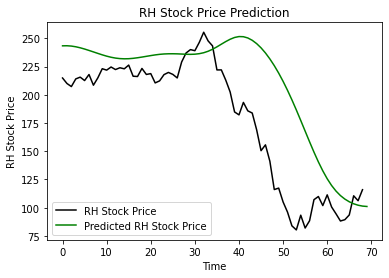

,Real_Px,Date,Pred_Px
0,214.86,2020-01-02,243.345932
1,210.00,2020-01-03,243.408340
2,207.27,2020-01-06,243.126968
3,214.06,2020-01-07,242.508743
4,215.62,2020-01-08,241.608429
...,...,...,...
64,89.42,2020-04-03,107.656250
65,93.60,2020-04-06,105.278687
66,110.56,2020-04-07,103.495880
67,106.21,2020-04-08,102.238411


Epoch 1/10
14/14 [==============================] - 31s 671ms/step - loss: 0.0593
Epoch 2/10
14/14 [==============================] - 9s 658ms/step - loss: 0.0126
Epoch 3/10
14/14 [==============================] - 8s 541ms/step - loss: 0.0134
Epoch 4/10
14/14 [==============================] - 8s 549ms/step - loss: 0.0129
Epoch 5/10
14/14 [==============================] - 7s 527ms/step - loss: 0.0126
Epoch 6/10
14/14 [==============================] - 7s 499ms/step - loss: 0.0108
Epoch 7/10
14/14 [==============================] - 7s 483ms/step - loss: 0.0092
Epoch 8/10
14/14 [==============================] - 7s 516ms/step - loss: 0.0098
Epoch 9/10
14/14 [==============================] - 7s 481ms/step - loss: 0.0082
Epoch 10/10
14/14 [==============================] - 6s 437ms/step - loss: 0.0080


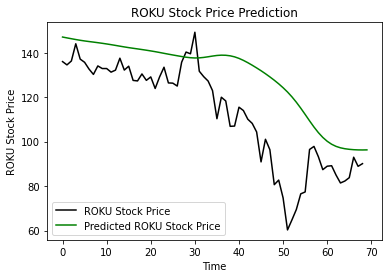

,Real_Px,Date,Pred_Px
0,135.9900,2020-01-02,147.034485
1,134.5100,2020-01-03,146.649628
2,136.2600,2020-01-06,146.277451
3,144.0100,2020-01-07,145.910797
4,137.1100,2020-01-08,145.574539
...,...,...,...
64,82.2800,2020-04-03,96.809845
65,83.7900,2020-04-06,96.546272
66,92.9900,2020-04-07,96.373367
67,88.9004,2020-04-08,96.278442


Epoch 1/10
14/14 [==============================] - 21s 422ms/step - loss: 0.0754
Epoch 2/10
14/14 [==============================] - 7s 523ms/step - loss: 0.0217
Epoch 3/10
14/14 [==============================] - 6s 408ms/step - loss: 0.0141
Epoch 4/10
14/14 [==============================] - 7s 466ms/step - loss: 0.0112
Epoch 5/10
14/14 [==============================] - 5s 382ms/step - loss: 0.0098
Epoch 6/10
14/14 [==============================] - 6s 456ms/step - loss: 0.0115
Epoch 7/10
14/14 [==============================] - 6s 388ms/step - loss: 0.0095
Epoch 8/10
14/14 [==============================] - 5s 318ms/step - loss: 0.0103
Epoch 9/10
14/14 [==============================] - 5s 333ms/step - loss: 0.0097
Epoch 10/10
14/14 [==============================] - 5s 360ms/step - loss: 0.0091


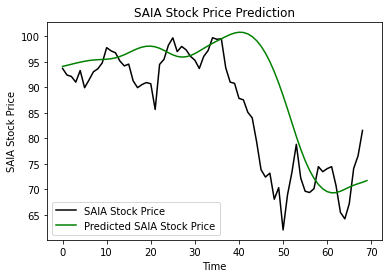

,Real_Px,Date,Pred_Px
0,93.71,2020-01-02,94.103874
1,92.41,2020-01-03,94.307938
2,92.13,2020-01-06,94.520073
3,91.01,2020-01-07,94.732460
4,93.29,2020-01-08,94.928802
...,...,...,...
64,64.18,2020-04-03,69.995270
65,67.17,2020-04-06,70.412491
66,74.07,2020-04-07,70.776970
67,76.57,2020-04-08,71.081230


Epoch 1/10
14/14 [==============================] - 24s 430ms/step - loss: 0.0707
Epoch 2/10
14/14 [==============================] - 6s 411ms/step - loss: 0.0172
Epoch 3/10
14/14 [==============================] - 6s 429ms/step - loss: 0.0113
Epoch 4/10
14/14 [==============================] - 8s 560ms/step - loss: 0.0114
Epoch 5/10
14/14 [==============================] - 8s 594ms/step - loss: 0.0105
Epoch 6/10
14/14 [==============================] - 9s 626ms/step - loss: 0.0106
Epoch 7/10
14/14 [==============================] - 8s 528ms/step - loss: 0.0099
Epoch 8/10
14/14 [==============================] - 7s 507ms/step - loss: 0.0094
Epoch 9/10
14/14 [==============================] - 9s 638ms/step - loss: 0.0097
Epoch 10/10
14/14 [==============================] - 12s 842ms/step - loss: 0.0095


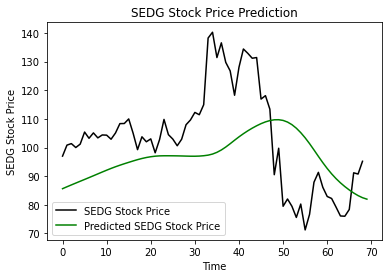

,Real_Px,Date,Pred_Px
0,97.000,2020-01-02,85.625458
1,100.840,2020-01-03,86.290131
2,101.370,2020-01-06,86.938583
3,100.000,2020-01-07,87.580894
4,101.190,2020-01-08,88.218063
...,...,...,...
64,76.000,2020-04-03,86.357132
65,78.360,2020-04-06,85.180244
66,91.169,2020-04-07,84.118271
67,90.740,2020-04-08,83.205429


Epoch 1/10
14/14 [==============================] - 40s 377ms/step - loss: 0.0818
Epoch 2/10
14/14 [==============================] - 6s 435ms/step - loss: 0.0355
Epoch 3/10
14/14 [==============================] - 9s 647ms/step - loss: 0.0321
Epoch 4/10
14/14 [==============================] - 8s 603ms/step - loss: 0.0235
Epoch 5/10
14/14 [==============================] - 9s 613ms/step - loss: 0.0220
Epoch 6/10
14/14 [==============================] - 9s 619ms/step - loss: 0.0195
Epoch 7/10
14/14 [==============================] - 9s 644ms/step - loss: 0.0187
Epoch 8/10
14/14 [==============================] - 9s 675ms/step - loss: 0.0172
Epoch 9/10
14/14 [==============================] - 8s 527ms/step - loss: 0.0176
Epoch 10/10
14/14 [==============================] - 8s 564ms/step - loss: 0.0180


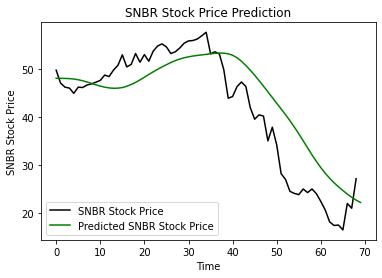

,Real_Px,Date,Pred_Px
0,49.82,2020-01-02,48.137619
1,47.12,2020-01-03,48.121838
2,46.28,2020-01-06,48.103863
3,46.08,2020-01-07,48.061737
4,44.98,2020-01-08,47.975590
...,...,...,...
64,17.47,2020-04-03,25.455647
65,16.45,2020-04-06,24.673571
66,21.97,2020-04-07,23.943830
67,20.98,2020-04-08,23.273193


Epoch 1/10
14/14 [==============================] - 43s 643ms/step - loss: 0.0807
Epoch 2/10
14/14 [==============================] - 9s 672ms/step - loss: 0.0211
Epoch 3/10
14/14 [==============================] - 11s 802ms/step - loss: 0.0133
Epoch 4/10
14/14 [==============================] - 13s 905ms/step - loss: 0.0123
Epoch 5/10
14/14 [==============================] - 9s 674ms/step - loss: 0.0096
Epoch 6/10
14/14 [==============================] - 9s 628ms/step - loss: 0.0084
Epoch 7/10
14/14 [==============================] - 9s 668ms/step - loss: 0.0076
Epoch 8/10
14/14 [==============================] - 10s 730ms/step - loss: 0.0081
Epoch 9/10
14/14 [==============================] - 11s 754ms/step - loss: 0.0078
Epoch 10/10
14/14 [==============================] - 9s 660ms/step - loss: 0.0076


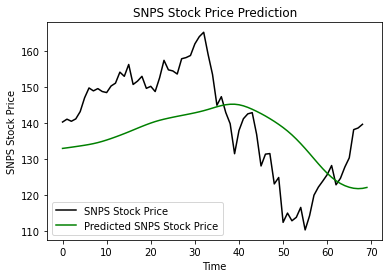

,Real_Px,Date,Pred_Px
0,140.3100,2020-01-02,132.983566
1,141.1000,2020-01-03,133.142715
2,140.5200,2020-01-06,133.312927
3,141.1800,2020-01-07,133.490021
4,143.2000,2020-01-08,133.671509
...,...,...,...
64,127.8100,2020-04-03,122.633759
65,130.3600,2020-04-06,122.194008
66,138.1950,2020-04-07,121.914757
67,138.6512,2020-04-08,121.808716


Epoch 1/10
14/14 [==============================] - 32s 587ms/step - loss: 0.0974
Epoch 2/10
14/14 [==============================] - 9s 674ms/step - loss: 0.0224
Epoch 3/10
14/14 [==============================] - 10s 709ms/step - loss: 0.0164
Epoch 4/10
14/14 [==============================] - 10s 678ms/step - loss: 0.0132
Epoch 5/10
14/14 [==============================] - 11s 766ms/step - loss: 0.0110
Epoch 6/10
14/14 [==============================] - 12s 891ms/step - loss: 0.0102
Epoch 7/10
14/14 [==============================] - 12s 855ms/step - loss: 0.0110
Epoch 8/10
14/14 [==============================] - 9s 667ms/step - loss: 0.0110
Epoch 9/10
14/14 [==============================] - 9s 673ms/step - loss: 0.0104
Epoch 10/10
14/14 [==============================] - 9s 609ms/step - loss: 0.0106


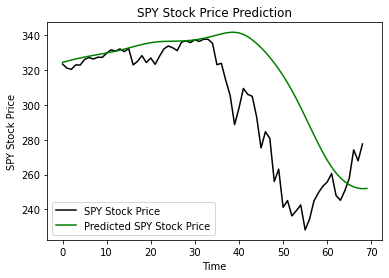

,Real_Px,Date,Pred_Px
0,323.54,2020-01-02,324.491394
1,321.16,2020-01-03,325.170624
2,320.49,2020-01-06,325.830261
3,323.02,2020-01-07,326.450745
4,322.94,2020-01-08,327.024200
...,...,...,...
64,250.76,2020-04-03,255.878189
65,257.84,2020-04-06,254.162598
66,274.21,2020-04-07,252.925110
67,267.96,2020-04-08,252.163467


Epoch 1/10
14/14 [==============================] - 24s 391ms/step - loss: 0.0996
Epoch 2/10
14/14 [==============================] - 7s 498ms/step - loss: 0.0269
Epoch 3/10
14/14 [==============================] - 7s 487ms/step - loss: 0.0186
Epoch 4/10
14/14 [==============================] - 8s 600ms/step - loss: 0.0197
Epoch 5/10
14/14 [==============================] - 8s 572ms/step - loss: 0.0168
Epoch 6/10
14/14 [==============================] - 6s 428ms/step - loss: 0.0160
Epoch 7/10
14/14 [==============================] - 6s 424ms/step - loss: 0.0150
Epoch 8/10
14/14 [==============================] - 4s 314ms/step - loss: 0.0142
Epoch 9/10
14/14 [==============================] - 5s 347ms/step - loss: 0.0153
Epoch 10/10
14/14 [==============================] - 5s 353ms/step - loss: 0.0134


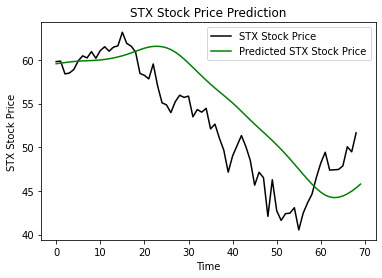

,Real_Px,Date,Pred_Px
0,59.81,2020-01-02,59.568378
1,59.86,2020-01-03,59.630695
2,58.40,2020-01-06,59.698746
3,58.50,2020-01-07,59.764484
4,58.90,2020-01-08,59.819740
...,...,...,...
64,47.46,2020-04-03,44.277435
65,47.87,2020-04-06,44.425426
66,50.06,2020-04-07,44.662228
67,49.48,2020-04-08,44.975529


Epoch 1/10
14/14 [==============================] - 23s 473ms/step - loss: 0.0573
Epoch 2/10
14/14 [==============================] - 7s 485ms/step - loss: 0.0205
Epoch 3/10
14/14 [==============================] - 8s 581ms/step - loss: 0.0167
Epoch 4/10
14/14 [==============================] - 7s 511ms/step - loss: 0.0130
Epoch 5/10
14/14 [==============================] - 6s 463ms/step - loss: 0.0130
Epoch 6/10
14/14 [==============================] - 6s 400ms/step - loss: 0.0131
Epoch 7/10
14/14 [==============================] - 7s 492ms/step - loss: 0.0114
Epoch 8/10
14/14 [==============================] - 7s 507ms/step - loss: 0.0112
Epoch 9/10
14/14 [==============================] - 7s 502ms/step - loss: 0.0101
Epoch 10/10
14/14 [==============================] - 7s 483ms/step - loss: 0.0087


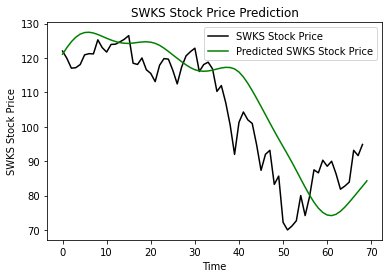

,Real_Px,Date,Pred_Px
0,122.01,2020-01-02,121.097481
1,119.84,2020-01-03,123.049004
2,117.04,2020-01-06,124.722343
3,117.17,2020-01-07,126.034348
4,118.08,2020-01-08,126.929626
...,...,...,...
64,82.75,2020-04-03,76.630318
65,83.91,2020-04-06,78.067070
66,93.15,2020-04-07,79.586929
67,91.60,2020-04-08,81.139030


Epoch 1/10
14/14 [==============================] - 22s 469ms/step - loss: 0.0696
Epoch 2/10
14/14 [==============================] - 6s 428ms/step - loss: 0.0236
Epoch 3/10
14/14 [==============================] - 6s 415ms/step - loss: 0.0114
Epoch 4/10
14/14 [==============================] - 6s 433ms/step - loss: 0.0086
Epoch 5/10
14/14 [==============================] - 6s 437ms/step - loss: 0.0097
Epoch 6/10
14/14 [==============================] - 6s 431ms/step - loss: 0.0096
Epoch 7/10
14/14 [==============================] - 6s 429ms/step - loss: 0.0094
Epoch 8/10
14/14 [==============================] - 6s 406ms/step - loss: 0.0084
Epoch 9/10
14/14 [==============================] - 7s 513ms/step - loss: 0.0078
Epoch 10/10
14/14 [==============================] - 8s 571ms/step - loss: 0.0090


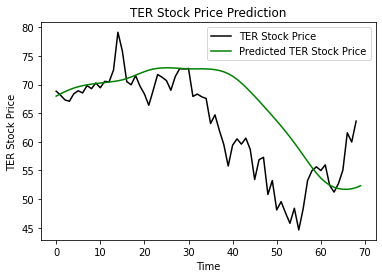

,Real_Px,Date,Pred_Px
0,68.84,2020-01-02,67.965370
1,68.13,2020-01-03,68.376312
2,67.31,2020-01-06,68.756317
3,67.08,2020-01-07,69.093750
4,68.39,2020-01-08,69.379585
...,...,...,...
64,52.71,2020-04-03,51.825985
65,55.06,2020-04-06,51.712605
66,61.57,2020-04-07,51.698288
67,59.95,2020-04-08,51.791351


Epoch 1/10
14/14 [==============================] - 19s 444ms/step - loss: 0.0645
Epoch 2/10
14/14 [==============================] - 6s 416ms/step - loss: 0.0243
Epoch 3/10
14/14 [==============================] - 7s 473ms/step - loss: 0.0107
Epoch 4/10
14/14 [==============================] - 7s 491ms/step - loss: 0.0097
Epoch 5/10
14/14 [==============================] - 7s 464ms/step - loss: 0.0090
Epoch 6/10
14/14 [==============================] - 6s 433ms/step - loss: 0.0090
Epoch 7/10
14/14 [==============================] - 7s 468ms/step - loss: 0.0100
Epoch 8/10
14/14 [==============================] - 6s 444ms/step - loss: 0.0090
Epoch 9/10
14/14 [==============================] - 6s 442ms/step - loss: 0.0084
Epoch 10/10
14/14 [==============================] - 7s 476ms/step - loss: 0.0078


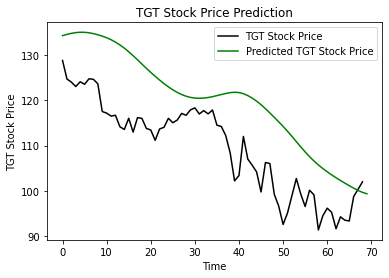

,Real_Px,Date,Pred_Px
0,128.74,2020-01-02,134.220505
1,124.66,2020-01-03,134.491379
2,123.97,2020-01-06,134.722107
3,123.00,2020-01-07,134.888336
4,124.05,2020-01-08,134.968582
...,...,...,...
64,93.53,2020-04-03,101.707314
65,93.36,2020-04-06,101.142311
66,98.75,2020-04-07,100.595879
67,100.35,2020-04-08,100.092628


Epoch 1/10
14/14 [==============================] - 26s 525ms/step - loss: 0.0597
Epoch 2/10
14/14 [==============================] - 7s 530ms/step - loss: 0.0197
Epoch 3/10
14/14 [==============================] - 7s 520ms/step - loss: 0.0170
Epoch 4/10
14/14 [==============================] - 7s 479ms/step - loss: 0.0149
Epoch 5/10
14/14 [==============================] - 7s 476ms/step - loss: 0.0132
Epoch 6/10
14/14 [==============================] - 7s 478ms/step - loss: 0.0157
Epoch 7/10
14/14 [==============================] - 8s 591ms/step - loss: 0.0138
Epoch 8/10
14/14 [==============================] - 8s 560ms/step - loss: 0.0141
Epoch 9/10
14/14 [==============================] - 7s 519ms/step - loss: 0.0144
Epoch 10/10
14/14 [==============================] - 6s 452ms/step - loss: 0.0125


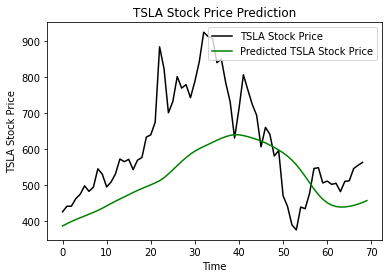

,Real_Px,Date,Pred_Px
0,424.95,2020-01-02,385.632172
1,440.50,2020-01-03,392.113312
2,440.47,2020-01-06,398.050690
3,461.40,2020-01-07,403.426788
4,473.70,2020-01-08,408.413788
...,...,...,...
64,509.50,2020-04-03,438.521667
65,511.16,2020-04-06,440.176697
66,545.00,2020-04-07,442.803802
67,554.20,2020-04-08,446.355865


Epoch 1/10
14/14 [==============================] - 19s 480ms/step - loss: 0.0778
Epoch 2/10
14/14 [==============================] - 8s 589ms/step - loss: 0.0234
Epoch 3/10
14/14 [==============================] - 9s 631ms/step - loss: 0.0209
Epoch 4/10
14/14 [==============================] - 8s 570ms/step - loss: 0.0186
Epoch 5/10
14/14 [==============================] - 9s 628ms/step - loss: 0.0166
Epoch 6/10
14/14 [==============================] - 8s 570ms/step - loss: 0.0149
Epoch 7/10
14/14 [==============================] - 9s 629ms/step - loss: 0.0132
Epoch 8/10
14/14 [==============================] - 10s 697ms/step - loss: 0.0145
Epoch 9/10
14/14 [==============================] - 8s 584ms/step - loss: 0.0120
Epoch 10/10
14/14 [==============================] - 7s 518ms/step - loss: 0.0124


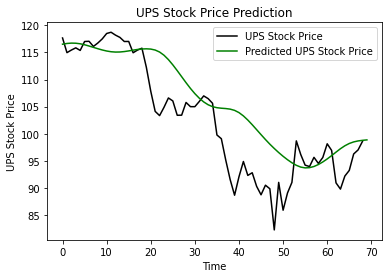

,Real_Px,Date,Pred_Px
0,117.68,2020-01-02,116.529648
1,114.97,2020-01-03,116.666206
2,115.45,2020-01-06,116.731628
3,115.86,2020-01-07,116.711700
4,115.38,2020-01-08,116.607399
...,...,...,...
64,92.17,2020-04-03,97.764687
65,93.21,2020-04-06,98.187820
66,96.25,2020-04-07,98.478874
67,97.00,2020-04-08,98.659935


Epoch 1/10
14/14 [==============================] - 24s 540ms/step - loss: 0.0698
Epoch 2/10
14/14 [==============================] - 8s 549ms/step - loss: 0.0198
Epoch 3/10
14/14 [==============================] - 7s 504ms/step - loss: 0.0148
Epoch 4/10
14/14 [==============================] - 9s 644ms/step - loss: 0.0119
Epoch 5/10
14/14 [==============================] - 9s 646ms/step - loss: 0.0116
Epoch 6/10
14/14 [==============================] - 10s 719ms/step - loss: 0.0095
Epoch 7/10
14/14 [==============================] - 11s 782ms/step - loss: 0.0086
Epoch 8/10
14/14 [==============================] - 10s 703ms/step - loss: 0.0090
Epoch 9/10
14/14 [==============================] - 9s 626ms/step - loss: 0.0097
Epoch 10/10
14/14 [==============================] - 8s 592ms/step - loss: 0.0070


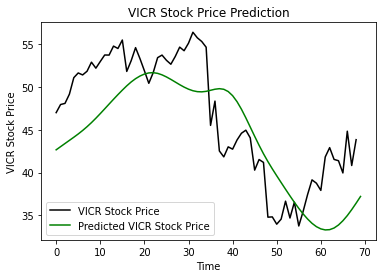

,Real_Px,Date,Pred_Px
0,47.00,2020-01-02,42.654400
1,47.95,2020-01-03,43.022919
2,48.08,2020-01-06,43.390987
3,49.16,2020-01-07,43.757130
4,51.09,2020-01-08,44.124676
...,...,...,...
64,41.38,2020-04-03,33.864010
65,39.95,2020-04-06,34.358784
66,44.83,2020-04-07,34.963604
67,40.82,2020-04-08,35.660023


Epoch 1/10
14/14 [==============================] - 40s 644ms/step - loss: 0.1108
Epoch 2/10
14/14 [==============================] - 9s 642ms/step - loss: 0.0313
Epoch 3/10
14/14 [==============================] - 8s 588ms/step - loss: 0.0144
Epoch 4/10
14/14 [==============================] - 9s 663ms/step - loss: 0.0103
Epoch 5/10
14/14 [==============================] - 10s 703ms/step - loss: 0.0099
Epoch 6/10
14/14 [==============================] - 9s 677ms/step - loss: 0.0098
Epoch 7/10
14/14 [==============================] - 10s 692ms/step - loss: 0.0092
Epoch 8/10
14/14 [==============================] - 10s 689ms/step - loss: 0.0097
Epoch 9/10
14/14 [==============================] - 10s 743ms/step - loss: 0.0082
Epoch 10/10
14/14 [==============================] - 9s 680ms/step - loss: 0.0080


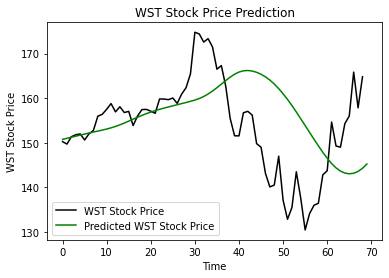

,Real_Px,Date,Pred_Px
0,150.25,2020-01-02,150.760437
1,149.70,2020-01-03,150.991394
2,151.35,2020-01-06,151.231308
3,151.79,2020-01-07,151.472931
4,151.98,2020-01-08,151.713104
...,...,...,...
64,154.28,2020-04-03,143.198425
65,156.00,2020-04-06,143.034164
66,165.84,2020-04-07,143.152420
67,157.82,2020-04-08,143.572495


Epoch 1/10
14/14 [==============================] - 29s 460ms/step - loss: 0.0787
Epoch 2/10
14/14 [==============================] - 8s 531ms/step - loss: 0.0195
Epoch 3/10
14/14 [==============================] - 8s 579ms/step - loss: 0.0167
Epoch 4/10
14/14 [==============================] - 8s 574ms/step - loss: 0.0113
Epoch 5/10
14/14 [==============================] - 7s 503ms/step - loss: 0.0104
Epoch 6/10
14/14 [==============================] - 7s 474ms/step - loss: 0.0087
Epoch 7/10
14/14 [==============================] - 8s 589ms/step - loss: 0.0078
Epoch 8/10
14/14 [==============================] - 6s 448ms/step - loss: 0.0077
Epoch 9/10
14/14 [==============================] - 6s 434ms/step - loss: 0.0091
Epoch 10/10
14/14 [==============================] - 8s 572ms/step - loss: 0.0080


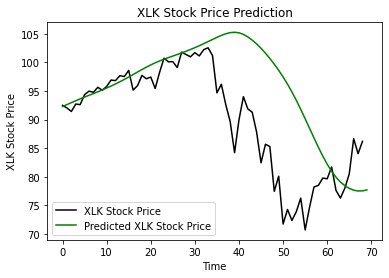

,Real_Px,Date,Pred_Px
0,92.50,2020-01-02,92.285782
1,92.03,2020-01-03,92.625160
2,91.42,2020-01-06,92.967430
3,92.72,2020-01-07,93.303925
4,92.62,2020-01-08,93.630806
...,...,...,...
64,77.99,2020-04-03,78.425896
65,80.51,2020-04-06,77.957024
66,86.65,2020-04-07,77.648148
67,84.04,2020-04-08,77.503647


Epoch 1/10
8/8 [==============================] - 28s 463ms/step - loss: 0.2327
Epoch 2/10
8/8 [==============================] - 4s 532ms/step - loss: 0.0547
Epoch 3/10
8/8 [==============================] - 4s 557ms/step - loss: 0.0352
Epoch 4/10
8/8 [==============================] - 5s 574ms/step - loss: 0.0277
Epoch 5/10
8/8 [==============================] - 4s 507ms/step - loss: 0.0215
Epoch 6/10
8/8 [==============================] - 4s 552ms/step - loss: 0.0197
Epoch 7/10
8/8 [==============================] - 4s 519ms/step - loss: 0.0206
Epoch 8/10
8/8 [==============================] - 4s 537ms/step - loss: 0.0197
Epoch 9/10
8/8 [==============================] - 4s 533ms/step - loss: 0.0178
Epoch 10/10
8/8 [==============================] - 4s 504ms/step - loss: 0.0189


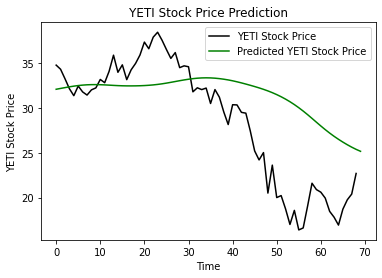

,Real_Px,Date,Pred_Px
0,34.78,2020-01-02,32.086384
1,34.32,2020-01-03,32.179424
2,33.26,2020-01-06,32.270805
3,32.15,2020-01-07,32.357422
4,31.37,2020-01-08,32.435265
...,...,...,...
64,16.93,2020-04-03,26.502380
65,18.71,2020-04-06,26.189102
66,19.75,2020-04-07,25.896580
67,20.39,2020-04-08,25.625824


In [6]:
for symbol in symbol_list:

    #read price History
    sql_query = f"""
    Select date, open, high, low, close, volume FROM PX_HISTORY where symbol = '{symbol}' and date > '{TRAINING_START_DATE.strftime("%Y-%m-%d")}'
    """
    price_df = pd.read_sql_query(sql_query, eft_data_connection_string)
    price_df = price_df.sort_values(by=['date'])
    price_df = price_df.set_index('date')
    price_df = price_df.dropna()

    train_set = get_dataSet(price_df, TRAINING_START_DATE, TRAINING_END_DATE)
    test_set = get_dataSet(price_df, PREDICTION_START_DATE, PREDICTION_END_DATE)
    dataset_train = train_set.iloc[:, 0:1].values   #price_df.iloc[:, 0:1].values
    dataset_test = test_set.iloc[:, 0:1].values   #price_df.iloc[:, 0:1].values
    real_stock_price = test_set.iloc[:, 0:1].values 
    training_cnt = len(train_set)
    test_cnt = len(test_set)

    #Data Normalization
    from sklearn.preprocessing import MinMaxScaler
    sc = MinMaxScaler(feature_range=(0,1))
    training_set_scaled = sc.fit_transform(dataset_train)

    # convert the data into a 3D array with X_train samples, 60 timestamps, and one feature at each step
    X_train = []
    y_train = []
    for i in range(60, training_cnt):
        X_train.append(training_set_scaled[i-60:i, 0])
        y_train.append(training_set_scaled[i, 0])
    X_train, y_train = np.array(X_train), np.array(y_train)

    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

    from keras.models import Sequential
    from keras.layers import LSTM
    from keras.layers import Dropout
    from keras.layers import Dense 

    #TODO: Increase Epochs to improve accuracy 
    model = Sequential()

    model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1], 1)))
    model.add(Dropout(0.2))

    model.add(LSTM(units=50,return_sequences=True))
    model.add(Dropout(0.2))

    model.add(LSTM(units=50,return_sequences=True))
    model.add(Dropout(0.2))

    model.add(LSTM(units=50))
    model.add(Dropout(0.2))

    model.add(Dense(units=1))

    model.compile(optimizer='adam',loss='mean_squared_error')

    model.fit(X_train,y_train,epochs=10,batch_size=32)

    dataset_total = pd.concat((train_set['open'], test_set['open']), axis = 0)
    inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
    inputs = inputs.reshape(-1,1)
    inputs = sc.transform(inputs)
    X_test = []
    for i in range(60, 130):
        X_test.append(inputs[i-60:i, 0])
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
    predicted_stock_price = model.predict(X_test)
    predicted_stock_price = sc.inverse_transform(predicted_stock_price)

    # Plot Chart - Price Prediction
    plt.plot(real_stock_price, color = 'black', label = (symbol + ' Stock Price'))
    plt.plot(predicted_stock_price, color = 'green', label = ('Predicted '+symbol+' Stock Price'))
    plt.title(symbol + ' Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel(symbol + ' Stock Price')
    plt.legend()
    plt.show()
    # Show the PX comparison (Real vs. Predicted Open)
    result_df = pd.DataFrame(test_set['open'])
    result_df["Date"] = result_df.index
    result_df.rename(columns = {'open':'Real_Px'}, inplace = True)
    result_df.reset_index(drop=True, inplace=True)
    result_df["Pred_Px"] = pd.DataFrame(predicted_stock_price)
    display(result_df)